In [1]:
from dataset import *
import torch
import numpy as np

In [ ]:
# Hyperparameters.
seed = 0
batch_size = 24
num_slots = 10
num_iterations = 3
resolution = (128, 128)
frame = 10

ckpt_dir='/home/skyworker/result/4DGS_SlotAttention/slot_4dgs'
ckpt_seq = 'movi_a_batchGS_01_50_base'

val_dir = '/home/skyworker/result/4DGS_SlotAttention/shape_of_motion/'
val_seq = 'movi_a_0000_anoMask'

In [159]:
from model import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resolution = (128, 128)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 14).to(device)
model.load_state_dict(torch.load(os.path.join(ckpt_dir,ckpt_seq,'last.ckpt' ))['model_state_dict'])

<All keys matched successfully>

In [160]:
test_set = ShapeOfMotion(os.path.join(val_dir,val_seq))

model = model.to(device)
image = test_set[frame]['gt_imgs'].to(device)
fg_gs = test_set[frame]['fg_gs'].to(device)
image = image[None]
fg_gs = fg_gs[None]
recon_combined, recons, masks, slots = model(fg_gs, image)

image = image.squeeze(0)
recon_combined = recon_combined.squeeze(0)
recons = recons.squeeze(0)
masks = masks.squeeze(0)

image = image.cpu().detach().numpy()
recon_combined = recon_combined.cpu().detach().numpy()
recons = recons.cpu().detach().numpy()
masks = masks.cpu().detach().numpy()

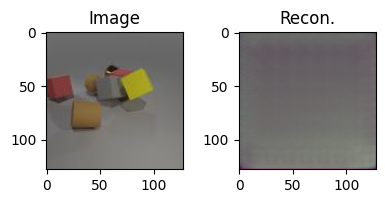

In [161]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
fig, ax = plt.subplots(1, 2, figsize=(4, 2))
# image = image.squeeze(0)
# image = image.permute(1,2,0).cpu().numpy()
# recon_combined = recon_combined.permute(1,2,0)
# plt.imshow(image, cmap='gray')
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(recon_combined)
ax[1].set_title('Recon.')
# for i in range(7):
#   picture = recons[i] * masks[i] + (1 - masks[i])
#   ax[i + 2].imshow(picture)
#   ax[i + 2].set_title('Slot %s' % str(i + 1))
# for i in range(len(ax)):
#   ax[i].grid(False)
#   ax[i].axis('off')
plt.tight_layout()

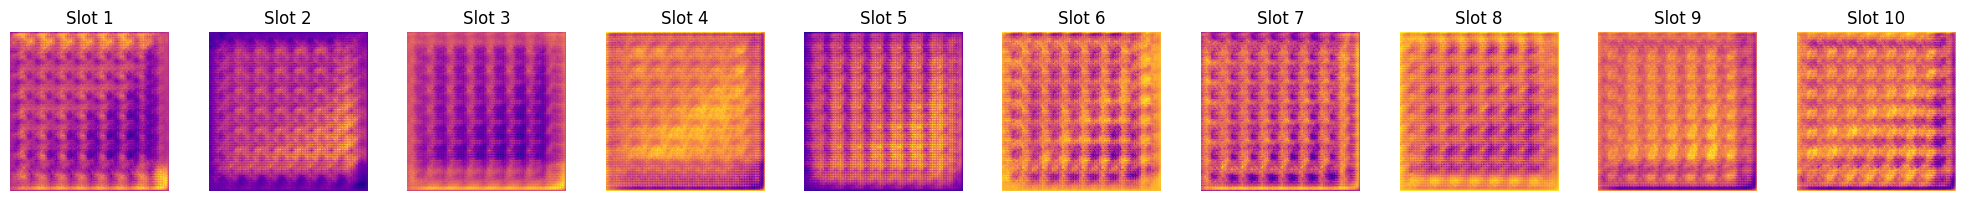

In [162]:
fig, ax = plt.subplots(1, num_slots, figsize=(20, 2))
for i in range(num_slots):
  picture = masks[i]
  # picture = recons[i] * masks[i] + (1 - masks[i])
  ax[i].imshow(picture, cmap="plasma")
  ax[i].set_title('Slot %s' % str(i + 1))
for i in range(len(ax)):
  ax[i].grid(False)
  ax[i].axis('off')
plt.tight_layout()